# import module

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
import sys
import os

# Get absolute path to the project root (one directory up from notebooks)
project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))
sys.path.append(project_root)

print(project_root)

c:\Users\user\Desktop\Project\Bati_Bank


# import scr file

In [4]:
import importlib.util
import sys
import os
module_path = r'C:\Users\user\Desktop\Project\Bati_Bank\src\data_processing.py'
spec = importlib.util.spec_from_file_location("data_loader", module_path)
data_loader = importlib.util.module_from_spec(spec)
spec.loader.exec_module(data_loader)

# now you can access your function
load_data = data_loader.load_data

# test
print(load_data)

<function load_data at 0x00000156EF28AE80>


# Load data

In [5]:
df = load_data(r"C:\Users\user\Desktop\Project\Bati_Bank\data\raw\loan.csv")

# Data cleaning

In [6]:
# column name
print(df.head())

         TransactionId         BatchId       AccountId       SubscriptionId  \
0  TransactionId_76871   BatchId_36123  AccountId_3957   SubscriptionId_887   
1  TransactionId_73770   BatchId_15642  AccountId_4841  SubscriptionId_3829   
2  TransactionId_26203   BatchId_53941  AccountId_4229   SubscriptionId_222   
3    TransactionId_380  BatchId_102363   AccountId_648  SubscriptionId_2185   
4  TransactionId_28195   BatchId_38780  AccountId_4841  SubscriptionId_3829   

        CustomerId CurrencyCode  CountryCode    ProviderId     ProductId  \
0  CustomerId_4406          UGX          256  ProviderId_6  ProductId_10   
1  CustomerId_4406          UGX          256  ProviderId_4   ProductId_6   
2  CustomerId_4683          UGX          256  ProviderId_6   ProductId_1   
3   CustomerId_988          UGX          256  ProviderId_1  ProductId_21   
4   CustomerId_988          UGX          256  ProviderId_4   ProductId_6   

      ProductCategory    ChannelId   Amount  Value  TransactionStart

In [7]:
# column information 
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95662 entries, 0 to 95661
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TransactionId         95662 non-null  object 
 1   BatchId               95662 non-null  object 
 2   AccountId             95662 non-null  object 
 3   SubscriptionId        95662 non-null  object 
 4   CustomerId            95662 non-null  object 
 5   CurrencyCode          95662 non-null  object 
 6   CountryCode           95662 non-null  int64  
 7   ProviderId            95662 non-null  object 
 8   ProductId             95662 non-null  object 
 9   ProductCategory       95662 non-null  object 
 10  ChannelId             95662 non-null  object 
 11  Amount                95662 non-null  float64
 12  Value                 95662 non-null  int64  
 13  TransactionStartTime  95662 non-null  object 
 14  PricingStrategy       95662 non-null  int64  
 15  FraudResult        

In [8]:
# statical data
print(df.describe())

       CountryCode        Amount         Value  PricingStrategy   FraudResult
count      95662.0  9.566200e+04  9.566200e+04     95662.000000  95662.000000
mean         256.0  6.717846e+03  9.900584e+03         2.255974      0.002018
std            0.0  1.233068e+05  1.231221e+05         0.732924      0.044872
min          256.0 -1.000000e+06  2.000000e+00         0.000000      0.000000
25%          256.0 -5.000000e+01  2.750000e+02         2.000000      0.000000
50%          256.0  1.000000e+03  1.000000e+03         2.000000      0.000000
75%          256.0  2.800000e+03  5.000000e+03         2.000000      0.000000
max          256.0  9.880000e+06  9.880000e+06         4.000000      1.000000


In [9]:
 # check missing values
print(df.isnull().sum()) 

TransactionId           0
BatchId                 0
AccountId               0
SubscriptionId          0
CustomerId              0
CurrencyCode            0
CountryCode             0
ProviderId              0
ProductId               0
ProductCategory         0
ChannelId               0
Amount                  0
Value                   0
TransactionStartTime    0
PricingStrategy         0
FraudResult             0
dtype: int64


In [10]:
# check duplicate
print(df.duplicated().sum())  


0


In [11]:
#missing value proportion
null_val_sums = df.isnull().sum()
pd.DataFrame({"Column": null_val_sums.index, "Number of Null Values": null_val_sums.values,
"Proportion": null_val_sums.values / len(df) })

,Column,Number of Null Values,Proportion
0,TransactionId,0,0.0
1,BatchId,0,0.0
2,AccountId,0,0.0
3,SubscriptionId,0,0.0
4,CustomerId,0,0.0
5,CurrencyCode,0,0.0
6,CountryCode,0,0.0
7,ProviderId,0,0.0
8,ProductId,0,0.0
9,ProductCategory,0,0.0


# data types

In [12]:
#lists the columns with categorical data
object_train_df=df.select_dtypes(include=['object'])    
object_train_df.columns

Index(['TransactionId', 'BatchId', 'AccountId', 'SubscriptionId', 'CustomerId',
       'CurrencyCode', 'ProviderId', 'ProductId', 'ProductCategory',
       'ChannelId', 'TransactionStartTime'],
      dtype='object')

In [13]:
#lists the columns with numerical data
num_train_df=df.select_dtypes(include=['int','float'])     
num_train_df.columns

Index(['CountryCode', 'Amount', 'Value', 'PricingStrategy', 'FraudResult'], dtype='object')

# Visualizing

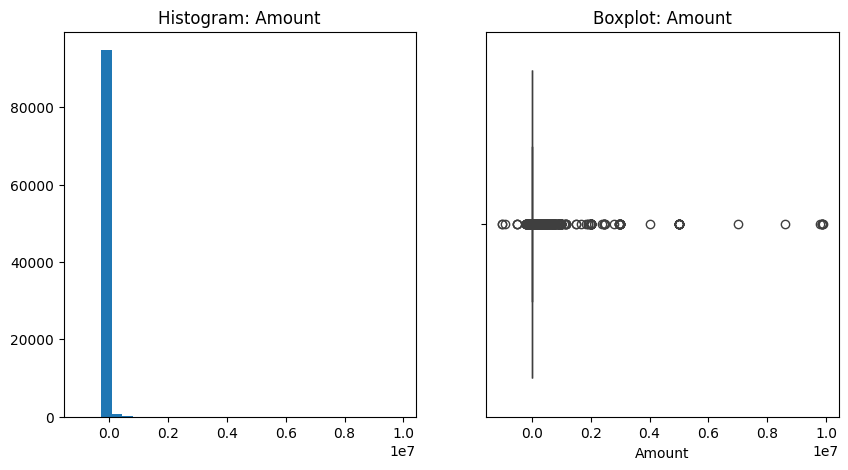

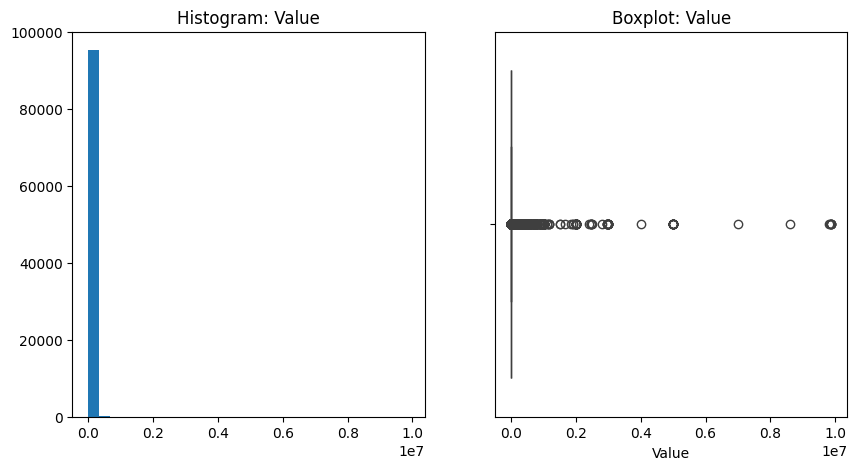

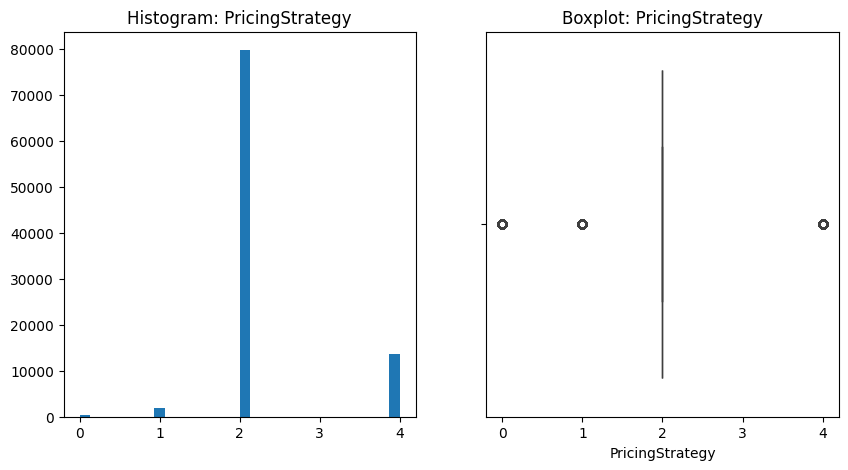

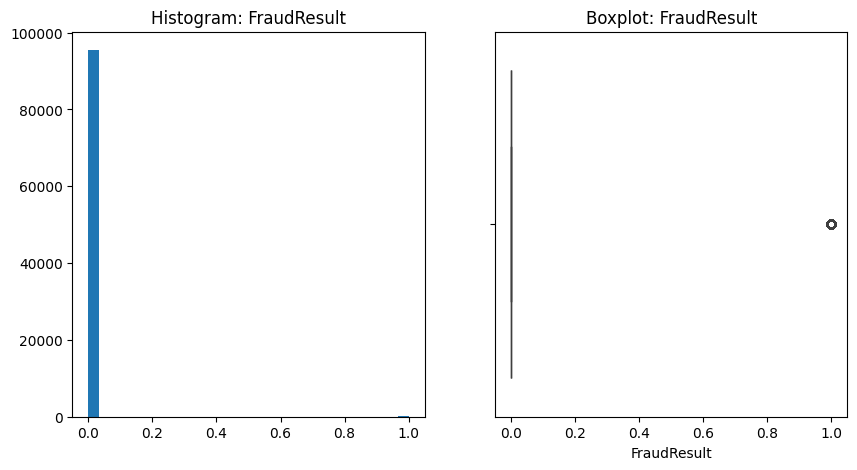

In [17]:
 #Visualize distributions
import seaborn as sns
numeric_cols = [ "Amount", "Value", "PricingStrategy", "FraudResult"]
for col in numeric_cols:
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    plt.hist(df[col].dropna(), bins=30)
    plt.title(f"Histogram: {col}")
    plt.subplot(1,2,2)
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot: {col}")
    plt.show()

In [18]:
#Detect outliers (IQR method)
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower) | (data[column] > upper)]
    return outliers, lower, upper

for col in numeric_cols:
    outliers, low, high = detect_outliers_iqr(df, col)
    print(f"\nColumn: {col}")
    print(f"Lower Bound: {low}, Upper Bound: {high}")
    print(f"Outliers detected: {len(outliers)}")


Column: Amount
Lower Bound: -4325.0, Upper Bound: 7075.0
Outliers detected: 24441

Column: Value
Lower Bound: -6812.5, Upper Bound: 12087.5
Outliers detected: 9021

Column: PricingStrategy
Lower Bound: 2.0, Upper Bound: 2.0
Outliers detected: 15814

Column: FraudResult
Lower Bound: 0.0, Upper Bound: 0.0
Outliers detected: 193


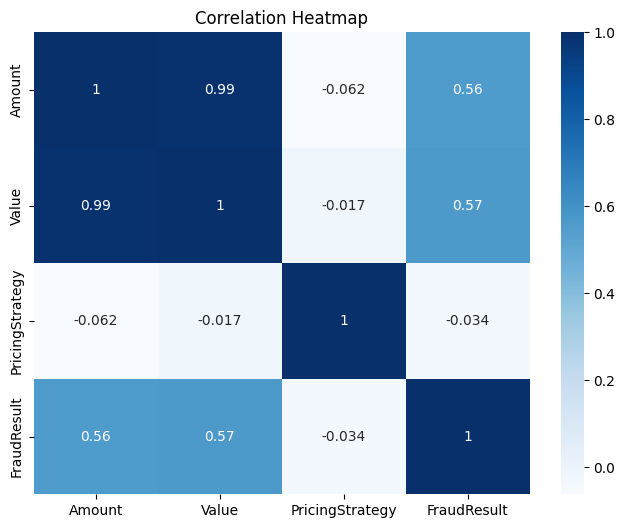

In [19]:
#Correlation matrix
plt.figure(figsize=(8,6))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap="Blues")
plt.title("Correlation Heatmap")
plt.show()